<a href="https://colab.research.google.com/github/Sakshi-2/Accidents/blob/main/Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Barcelona Accidents 2017 Dataset **



Exploratory data analysis 



In [ ]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

In [ ]:
#fetching the dataset from github
url='https://raw.githubusercontent.com/Sakshi-2/Accidents/main/accidents_2017.csv'
df=pd.read_csv(url)



---



Cleaning up the data

In [ ]:
print("shape of dataframe:",df.shape)

shape of dataframe: (10339, 15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [ ]:
df.head(1)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045


In [ ]:
df.isnull().sum().any()

False

In [ ]:
#replacing the unknown values as null
df.replace('Unknown',np.nan, inplace=True)

In [ ]:
df.isnull().sum().any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10312 non-null  object 
 2   Neighborhood Name  10312 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


The District, Neighborhood, Street with most accidents

In [ ]:
df['Street'].value_counts().idxmax()

'Corts Catalanes                                   '

In [ ]:
df['District Name'].value_counts().idxmax()

'Eixample'

In [ ]:
df['Neighborhood Name'].value_counts().idxmax()

"la Dreta de l'Eixample"

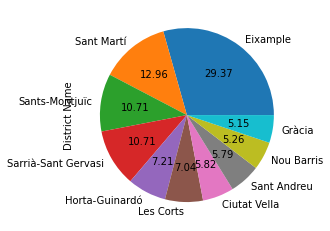

In [ ]:
df['District Name'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()



In [ ]:
#dropping the unneccessary values as we'll use other variables instead of them
df.drop(['District Name','Neighborhood Name','Part of the day'],axis=1 ,inplace=True)

In [ ]:
df.columns

Index(['Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [ ]:
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

In [ ]:
df.columns

Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries',
       'serious_injuries', 'victims', 'vehicles_involved', 'longitude',
       'latitude'],
      dtype='object')

In [ ]:
#to combine year, month, day to date
df['year'] = np.repeat(2017,df.shape[0])

In [ ]:
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,December,8,21,5,0,5,2,2.167356,41.360886,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,July,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,May,25,14,1,0,1,3,2.185272,41.416365,2017


In [ ]:
list(df.month.unique())

['October',
 'September',
 'December',
 'July',
 'May',
 'June',
 'January',
 'April',
 'March',
 'November',
 'February',
 'August']

In [ ]:
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df['month'].replace(month_to_int,inplace=True)
list(df.month.unique())

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

In [ ]:
df['date']=pd.to_datetime(df[['year', 'month', 'day','hour']])
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360886,2017,2017-12-08 21:00:00
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017,2017-07-21 02:00:00
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017,2017-05-25 14:00:00


In [ ]:
df.date.dtypes

dtype('<M8[ns]')

In [ ]:
df['date'].dt.year
df['date'].dt.month
df['date'].dt.day
df['date'].dt.hour
df['date'].dt.dayofweek
df['date'].dt.dayofweek.head()

0    4
1    4
2    4
3    4
4    3
Name: date, dtype: int64

In [ ]:
df.drop(['hour','day','month','year','weekday'], axis=1, inplace=True)

In [ ]:
list(df.columns)

['id',
 'street',
 'mild_injuries',
 'serious_injuries',
 'victims',
 'vehicles_involved',
 'longitude',
 'latitude',
 'date']

In [ ]:
df.head(1)


,id,street,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
0,2017S008429,Número 27 ...,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00


In [ ]:
#all information about one id
df.id.loc[0]

df.id = df.id.apply(lambda x: x.strip())

df.id.loc[0]

df.set_index('id', inplace=True)

df.loc['2017S008429']

street               Número 27                                     ...
mild_injuries                                                        2
serious_injuries                                                     0
victims                                                              2
vehicles_involved                                                    2
longitude                                                     2.125624
latitude                                                     41.340045
date                                               2017-10-13 08:00:00
Name: 2017S008429, dtype: object

In [ ]:
#to remove all the duplicates
df.duplicated().sum()

6

In [ ]:
df[df.duplicated()]

,street,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,,
2017S006811,Diagonal / Casanova ...,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,Concili de Trento / Espronceda ...,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,Energia ...,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,Diagonal / Bac de Roda ...,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,Bergara ...,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S004447,Taulat ...,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00


In [ ]:
df.shape

df.drop_duplicates(inplace=True)

df.shape

(10333, 8)



---



Data Visualisation

How many accidents were registered by the police?

In [ ]:
print('Total number of accidents in 2017 :{}'.format(df.shape[0]))

Total number of accidents in 2017 :10333


Distribution of accidents 

In [ ]:
import calendar
#every month
accidents_month = df.groupby(df['date'].dt.month).count().date

accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      844
February     824
March        935
April        842
May          962
June         908
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

Text(0.5, 0, 'Month')

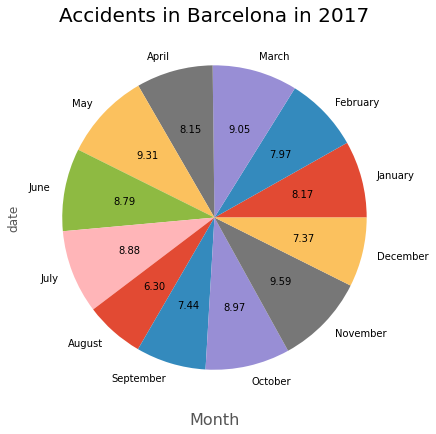

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#plot
accidents_month.plot(kind='pie',figsize=(12,7),autopct="%.2f")

plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)



Text(0.5, 0, 'Day of the week')

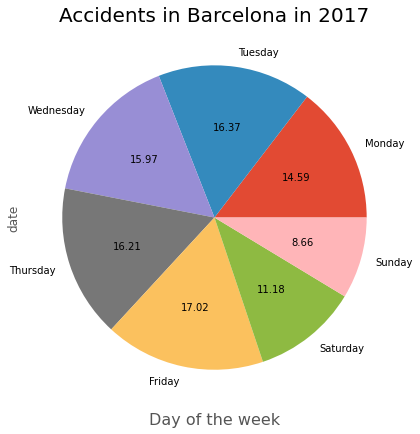

In [ ]:
#every day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

#plot
accidents_day.plot(kind='pie',figsize=(12,7),autopct="%.2f" )
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)


1) Do weekends have an effect on no. of accidents?

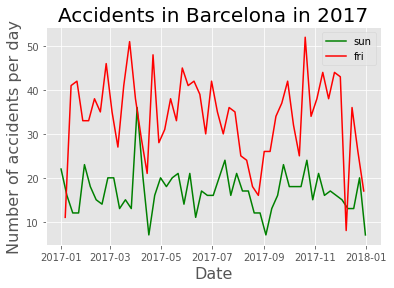

In [ ]:
accidents = df.groupby(df['date'].dt.date).count().date

#accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
#plt.scatter(sundays.index, sundays, color='green', label='sunday')
sundays.plot(kind='line', color ='green',label ='sun')
# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
#plt.scatter(friday.index, friday, color='red', label='friday')
friday.plot(kind='line', color ='red', label ='fri')
# Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

The no. of accidents are consistently lower on Sundays as compared to Fridays, this is because of fewer people driving for work.

The numbers are consistently high on fridays, this could be because of more people going out on weekend trips or night outs on Fridays.



2) Is there a safe time to drive on the roads?

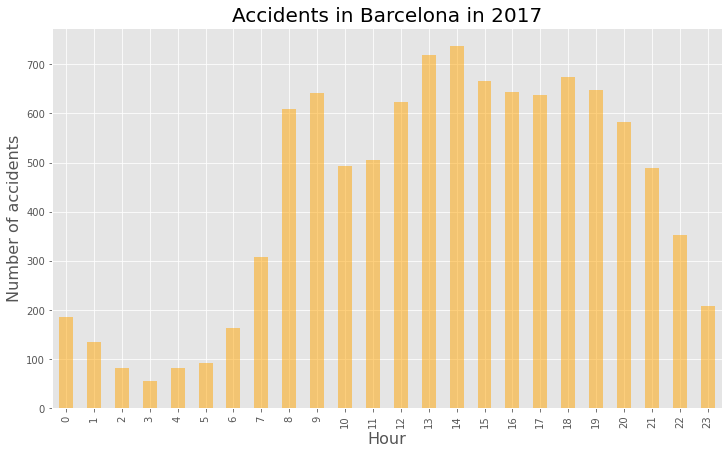

In [ ]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

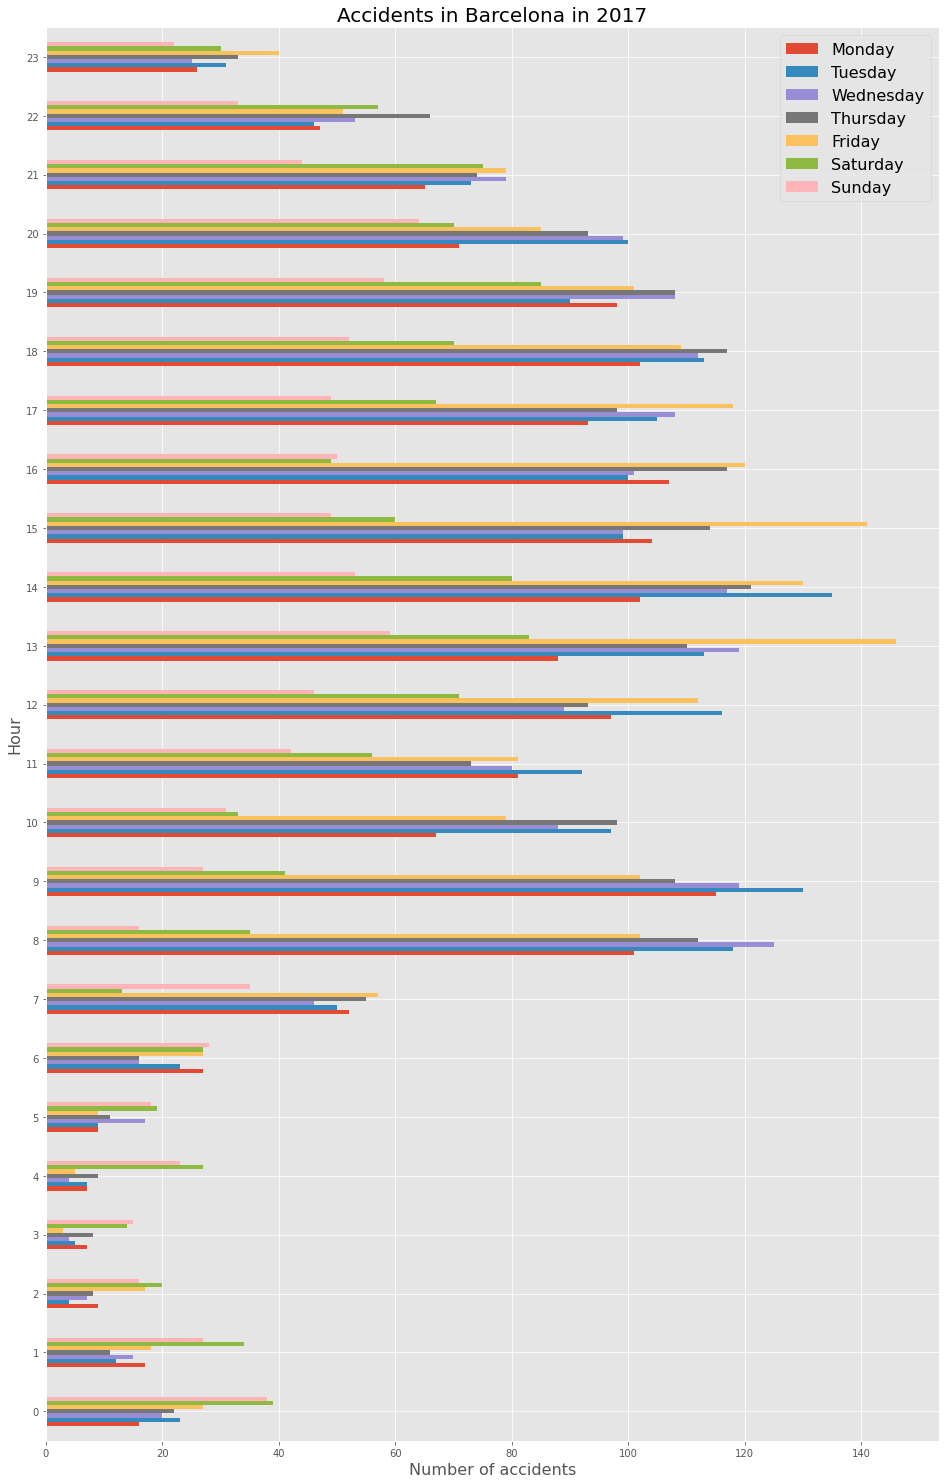

In [ ]:

# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

Day times after 8am- 8pm are more dangerous to drive on the road than it is to drive late night or early morning.

3) How many vehicles are likely to be involved in an accident?

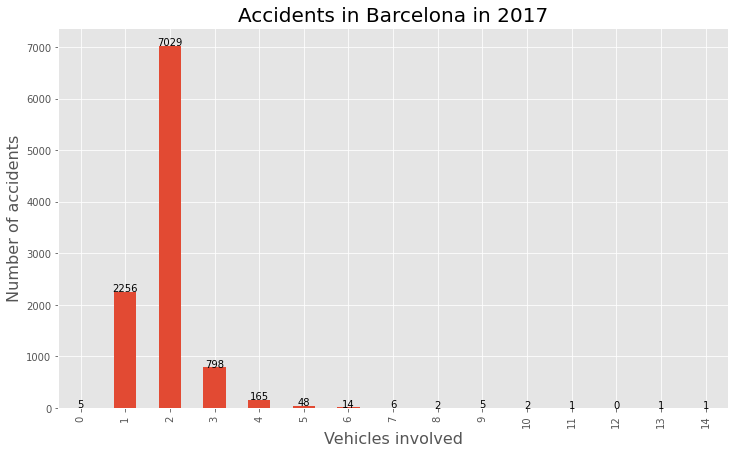

In [ ]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12]=0

vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7) )

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')

There is a very high chance of two people being involved in an accident than more than 3

4) How seriously can you get injured on a random day of the week?

Text(0, 0.5, '')

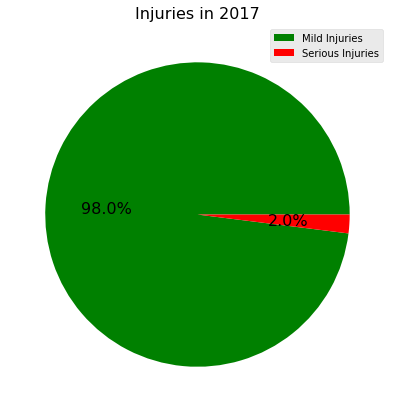

In [ ]:
# Serie with number of mild injuries and serious injuries
injuries = df[['mild_injuries','serious_injuries']].sum()

# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=16)
plt.ylabel('')

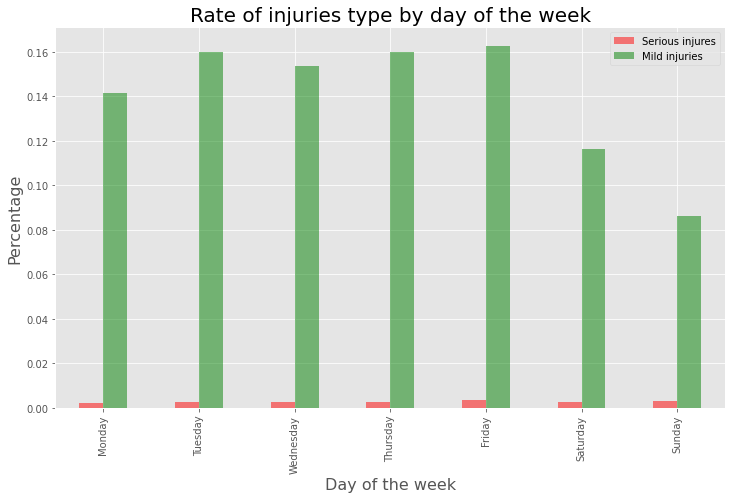

In [ ]:
# Number of serious injuries per day of the week
accidents_serious = df[df['serious_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().serious_injuries
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/(accidents_mild.sum()+accidents_serious.sum())

# Number of mild injuries per day of the week
accidents_mild = df[df['mild_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/(accidents_mild.sum()+accidents_serious.sum())

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injures':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

The ratio of serious to mild injuries are very low.

5)Likelihood of serious injury on a given day of the week

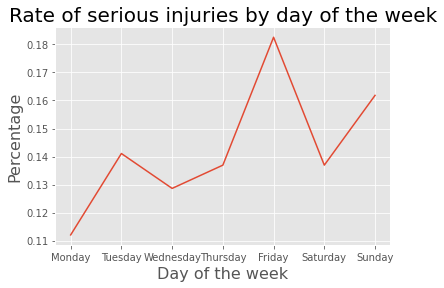

In [ ]:
rate_serious = accidents_serious/accidents_serious.sum()
rate_serious.plot()
# Title and labels
plt.title('Rate of serious injuries by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

There is a very less chance of gettig seriously injured in general but the chances of getting seriously injured surpasses mild injuries on weekends (fri, sat, sun) indicating more recklessness on weekends than weekdays.

In [ ]:
import folium

# Define a map centered around Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display the map
barcelona_map

6)Which regions are accidents most likely to take place?

In [ ]:
# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
    
# Show map
barcelona_map

6) How spread out is the number of accidents

In [ ]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map

When we zoom on the map of Barcelona, we see that the accidents are pretty much spread out evenly except for some regions 